# Lab 5 - Data Visualization

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [135]:
df3 = pd.read_csv("nfloffenseweek3.csv")
df4 = pd.read_csv("nfloffenseweek4.csv")
df5 = pd.read_csv("nfloffenseweek5.csv")
df_teams = pd.read_csv("nfl_teams.csv")

In [136]:
df3.insert(loc=2,column='week',value=3)
df4.insert(loc=2, column='week',value=4)
df5.insert(loc=2,column='week',value=5)

week_files = [df3, df4, df5]
df = pd.concat(week_files)
df

df.merge(df_teams,left_on="team", right_on="Name")

,rank,team,week,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,...,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,ID,Name,Abbreviation,Conference,Division
0,1,Baltimore Ravens,3,3,99,1141,166,6.9,3,1,...,44,5,42.9,8.6,35.63,3,Baltimore Ravens,BAL,AFC,North
1,3,Baltimore Ravens,4,4,119,1437,230,6.2,5,1,...,114,7,42.2,11.1,32.97,3,Baltimore Ravens,BAL,AFC,North
2,4,Baltimore Ravens,5,5,138,1762,291,6.1,6,1,...,162,9,43.6,10.9,36.86,3,Baltimore Ravens,BAL,AFC,North
3,2,Detroit Lions,3,3,95,1227,203,6.0,2,0,...,129,5,40.5,5.4,31.05,11,Detroit Lions,DET,NFC,North
4,1,Detroit Lions,4,4,140,1747,269,6.5,4,1,...,188,7,45.8,8.3,53.17,11,Detroit Lions,DET,NFC,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,30,Denver Broncos,4,4,66,1343,247,5.4,4,3,...,286,7,31.8,9.1,-6.92,10,Denver Broncos,DEN,AFC,West
83,31,Denver Broncos,5,5,75,1718,318,5.4,6,3,...,335,8,29.3,10.3,-18.28,10,Denver Broncos,DEN,AFC,West
84,32,Indianapolis Colts,3,3,40,994,207,4.8,6,2,...,153,4,22.9,17.1,-22.10,14,Indianapolis Colts,IND,AFC,South
85,32,Indianapolis Colts,4,4,57,1359,270,5.0,9,4,...,203,5,25.0,20.5,-18.74,14,Indianapolis Colts,IND,AFC,South


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

<BarContainer object of 96 artists>

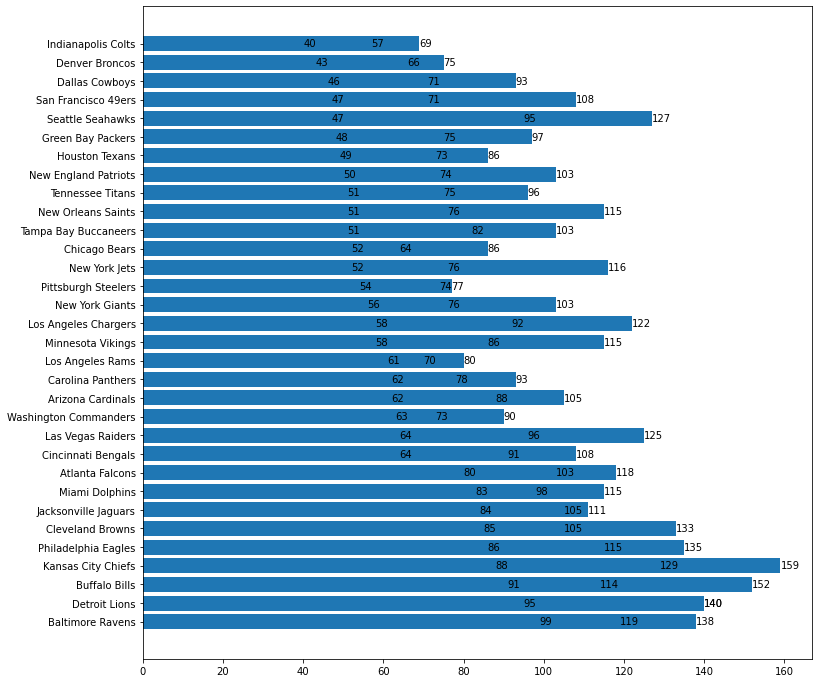

In [137]:
plt.figure(figsize=(12, 12))

#fig, ax = plt.subplots()
barhplot = plt.barh(df.team, df.points_scored )
plt.bar_label(barhplot, labels = df.points_scored)
barhplot

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

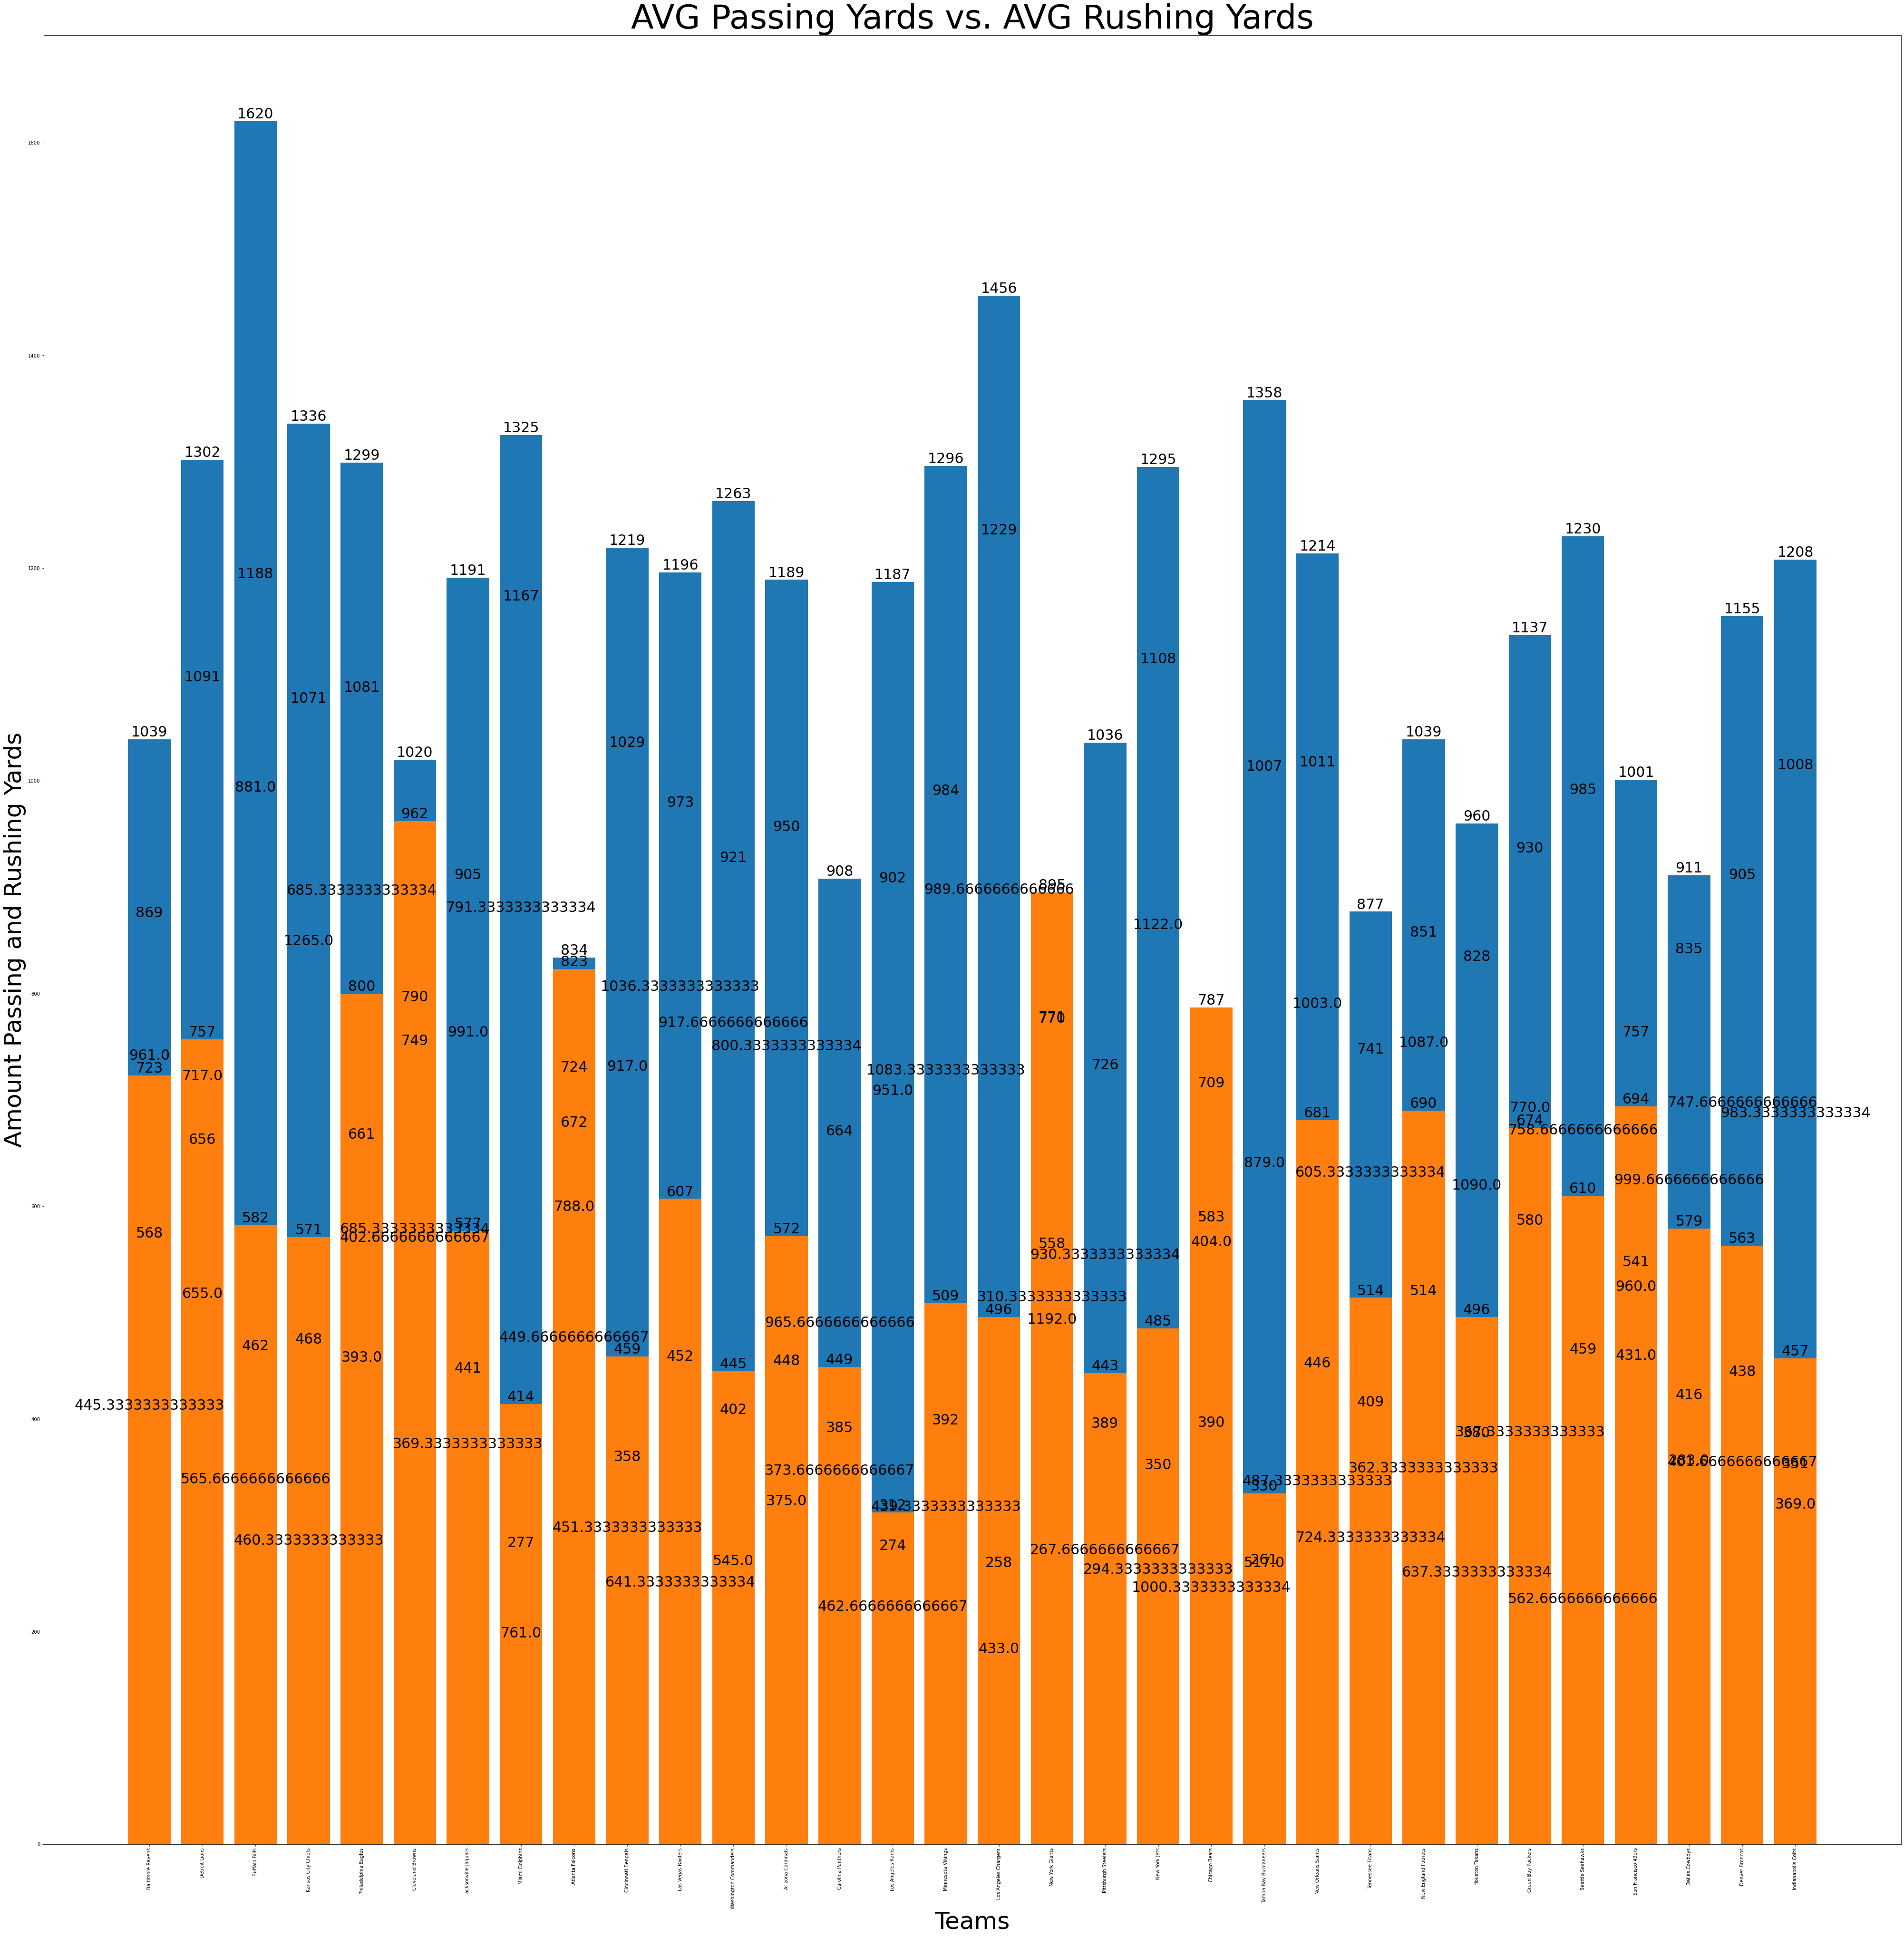

In [138]:
plt.figure(figsize=(70,70))
plt.title("AVG Passing Yards vs. AVG Rushing Yards", fontsize= 70)
plt.xlabel("Teams", fontsize= 50)
plt.ylabel("Amount Passing and Rushing Yards", fontsize= 50)
plt.xticks( rotation='vertical')

avg_passing = df.groupby('team')['passing_yards'].mean()
avg_rushing = df.groupby('team')['rushing_yards'].mean()

passingBar = plt.bar(df.team, df.passing_yards)
rushingBar = plt.bar(df.team, df.rushing_yards)


passing_yards = plt.bar_label(passingBar, labels=avg_passing,fontsize= 30)
rushing_yards = plt.bar_label(rushingBar, labels=avg_rushing,fontsize= 30)

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

Text(0.5, 1.0, 'AVG Total Yards Vs. AVG First Downs')

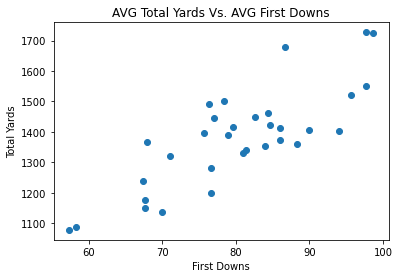

In [139]:
avg_first = df.groupby('team')['1st_downs'].mean()
avg_yards = df.groupby('team').total_yards.mean()
plt.scatter(avg_first, avg_yards)
plt.xlabel("First Downs")
plt.ylabel("Total Yards")
plt.title("AVG Total Yards Vs. AVG First Downs")

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

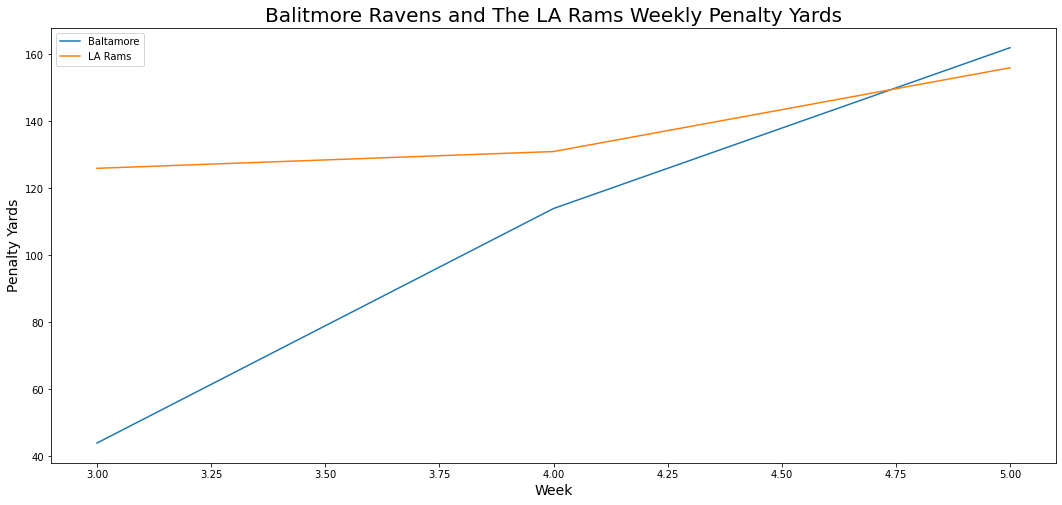

In [140]:
plt.figure(figsize=(18, 8))
plt.title("Balitmore Ravens and The LA Rams Weekly Penalty Yards",fontsize=20)
plt.xlabel("Week",fontsize=14)
plt.ylabel("Penalty Yards",fontsize=14)

Baltamore = (df.team == "Baltimore Ravens") 
Rams = (df.team == "Los Angeles Rams")

Balt_penaltyYards = df[Baltamore].penalty_yards
Rams_penaltyYards = df[Rams].penalty_yards
Baltamore_weeks = df[Baltamore].week
Rams_weeks = df[Baltamore].week

plt.plot(Baltamore_weeks,Balt_penaltyYards,label='Baltamore')
plt.plot(Rams_weeks,Rams_penaltyYards,label='LA Rams')
plt.legend(loc=0)

6. Plot the average total points vs average yards per play for each team as a bar chart (with total points on the y-axis and yards per play on the x-axis).

<BarContainer object of 32 artists>

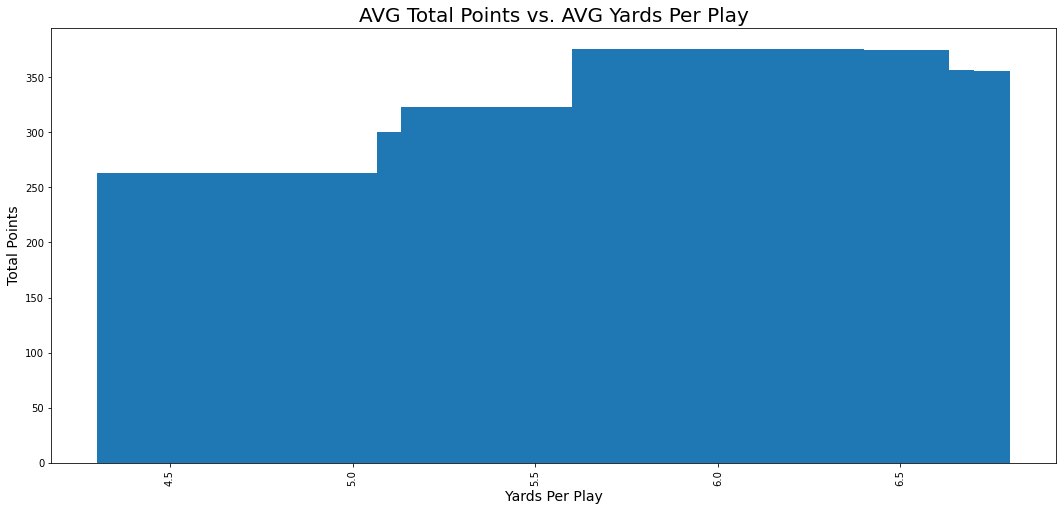

In [145]:
plt.figure(figsize=(18, 8))
plt.xticks( rotation='vertical')
plt.title("AVG Total Points vs. AVG Yards Per Play",fontsize=20)
plt.xlabel("Yards Per Play",fontsize=14)
plt.ylabel("Total Points",fontsize=14)

avg_points = df.groupby('team').points_scored.sum()
avg_yards_perPlay = df.groupby('team').yards_per_play.mean()

plt.bar(avg_yards_perPlay, avg_points)



7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

KeyError: 'Division'

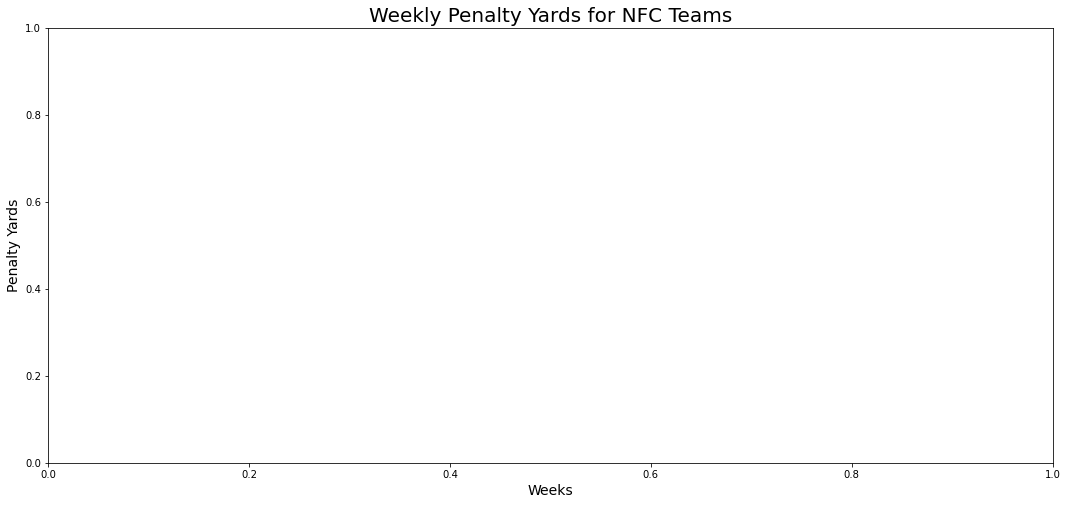

In [153]:
plt.figure(figsize=(18, 8))
plt.title("Weekly Penalty Yards for NFC Teams",fontsize="20")
plt.xlabel("Weeks",fontsize="14")
plt.ylabel("Penalty Yards",fontsize="14")

nfc_filter =(df["Division"] == "West") & (df["Conference"] == "NFC")
Penalty_yards = df[nfc_filter].penalty_yards.mean()
NFC_Weeks = df[nfc_filter].week

plt.bar(NFC_Weeks, Penalty_yards)

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

In [ ]:
plt.barh()
plt.xlabel("")
plt.ylabel("")